<a href="https://colab.research.google.com/github/gracesjy/mldl_study/blob/main/06_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **인피니티북스 "누구나 쉽게 배우는 딥러닝 스타트"(1판) 교재 소스 코드**

## **6장 오차 역전파**
---
* 출판사 : 인피니티북스( https://www.infinitybooks.co.kr )
* 저자 : 박동규
* 소스코드 저장소 : https://github.com/dongupak/DLstart
* 저작권 : 본 주피터 노트북 코드는 자유롭게 배포가능하지만 위의 출판사, 저자 표기와 함께 배포해 주십시오.
 * https://www.yes24.com/Product/Goods/124152667
 * 책의 오류는 dongupak@gmail.com 으로 알려주십시오.
---

### 02 역전파 알고리즘에 대한 직관적 이해
#### 계산 그래프의 순방향 계산

In [ ]:
# x, y, z 입력값 지정하기
x, y, z = 100, 200, 0.5
print('x =', x, 'y =', y, 'z =', z)

# 순방향 패스를 계산하자
q = x + y     # q는 300
f = q * z     # f는 150
print('순방향 패스의 결과 : q =', q, 'f =', f)

x = 100 y = 200 z = 0.5
순방향 패스의 결과 : q = 300 f = 150.0


#### 계산 그래프의 역방향 계산

In [ ]:
# 역방향 패스를 역순으로 수행하자
# 최초 역전파는 f = q * z부터 시작함
dfdz = q       # df/dz = q, z의 기울기는 300
dfdq = z       # df/dq = z, q의 기울기는 0.5
dqdx = 1.0
dqdy = 1.0
# q = x + y를 역전파 시켜보자
dfdx = dfdq * dqdx  # 연쇄법칙에 의한 값
dfdy = dfdq * dqdy

print('df/dx = ', dfdx)
print('df/dy = ', dfdy)
print('df/dz = ', dfdz)

df/dx =  0.5
df/dy =  0.5
df/dz =  300


### 04 시그모이드 계층의 역전파
#### 시그모이드 함수의 미분과 계산 그래프

In [ ]:
import math

n0 = 1.0
print('n0 =', n0)
n1 = n0 * -1.0
print('n1 =', n1)
n2 = math.e ** (n1)  # e**(-1)
print('n2 =', n2)
n3 = n2 + 1
print('n3 =', n3)
n4 = 1/n3
print('n4 =', n4)

n0 = 1.0
n1 = -1.0
n2 = 0.36787944117144233
n3 = 1.3678794411714423
n4 = 0.7310585786300049


### 05 ReLU 활성화 함수
#### 활성화 함수의 중요성

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 +np.exp(-x))

print('sigmoid(-2) :', sigmoid(-2))
print('sigmoid(-1) :', sigmoid(-1))
print('sigmoid( 0) :', sigmoid(0))
print('sigmoid( 1) :', sigmoid(1))
print('sigmoid( 2) :', sigmoid(2))

sigmoid(-2) : 0.11920292202211755
sigmoid(-1) : 0.2689414213699951
sigmoid( 0) : 0.5
sigmoid( 1) : 0.7310585786300049
sigmoid( 2) : 0.8807970779778823


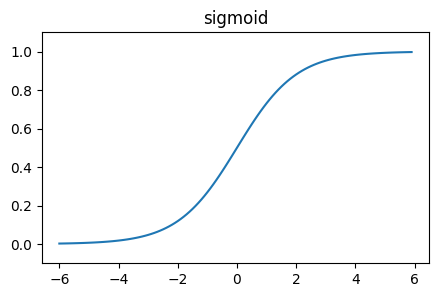

In [ ]:
inputs = np.arange(-6.0, 6.0, 0.1)   # 입력값의 범위
outputs = sigmoid(inputs)

plt.figure(figsize=(5, 3))
plt.plot(inputs, outputs)
plt.ylim(-0.1, 1.1)
plt.title("sigmoid",fontsize=12)
plt.show()

#### ReLU 함수를 그려보자

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def ReLU(x):
    return np.maximum(0, x)

print('ReLU(-2) :', ReLU(-2))
print('ReLU(-1) :', ReLU(-1))
print('ReLU( 0) :', ReLU(0))
print('ReLU( 1) :', ReLU(1))
print('ReLU( 2) :', ReLU(2))

ReLU(-2) : 0
ReLU(-1) : 0
ReLU( 0) : 0
ReLU( 1) : 1
ReLU( 2) : 2


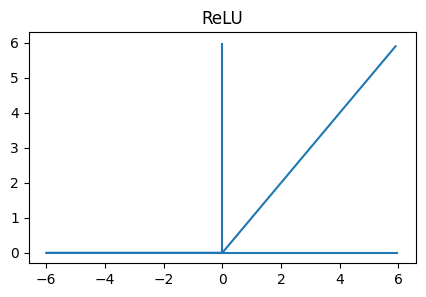

In [ ]:
inputs = np.arange(-6, 6, .1)
outputs = ReLU(inputs)

plt.figure(figsize=(5, 3))
plt.plot(inputs, outputs, label='ReLU')
plt.hlines(0, -6, 6)
plt.vlines(0, 0, 6)
plt.title("ReLU",fontsize=12)
plt.show()